# Exploratory Data Analysis on Ground Water Resources in India 2017

## Installing required modules

In [172]:
!pip install pandas matplotlib numpy geopandas descartes folium mapclassify --quiet 

## Importing the modules

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

## Loading Necessary CSV and SHP files

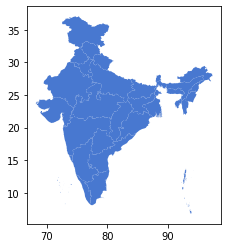

In [174]:
fp = "drive/MyDrive/Igismap/Indian_States.shp"
map_df = gpd.read_file(fp)
map_df.plot()

## Checking the columns of the main data frame

In [175]:
df_main = pd.read_csv('drive/MyDrive/Datasets/dgr_2017.csv')
df_main.columns

Index(['S.no.', 'Name of State', 'Name of District',
       'Recharge from rainfall During Monsoon Season',
       'Recharge from other sources During Monsoon Season',
       'Recharge from rainfall During Non Monsoon Season',
       'Recharge from other sources During Non Monsoon Season',
       'Total Annual Ground Water Recharge', 'Total Natural Discharges',
       'Annual Extractable Ground Water Resource',
       'Current Annual Ground Water Extraction For Irrigation',
       'Current Annual Ground Water Extraction For Domestic & Industrial Use',
       'Total Current Annual Ground Water Extraction',
       'Annual GW Allocation for Domestic Use as on 2025',
       'Net Ground Water Availability for future use',
       'Stage of Ground Water Extraction (%)'],
      dtype='object')

### On inspecting the columns and cross referencing with the report [Dynamic GW Resources 2011](http://cgwb.gov.in/Documents/Dynamic-GW-Resources-2011.pdf)


*   All the columns have their units in 10 thousand cubic metres.
*   Stage of Ground Water Extraction =
  + (Total Current Annual Ground Water Extraction / Annual Extractable Ground Water Resource)*100
*   Total Ground Water Recharge = 
  + Sum of all the Columns Labelled Recharge 
*   Total Current Annual Ground Water Extraction = 
  + Extraction For Irrigation + Extraction For Indusry and Domestic



In [176]:
df_main.head()

,S.no.,Name of State,Name of District,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1,ANDHRA PRADESH,Anantapur,89200.23,46136.12,1013.97,50415.31,186765.62,9338.31,177427.31,142953.85,14884.94,157838.79,21623.75,59410.09,88.96
1,2,ANDHRA PRADESH,Chittoor,115718.55,32389.60,1204.19,38028.60,187340.94,9367.06,177973.88,95256.50,9597.29,104853.79,13528.83,80858.36,58.92
2,3,ANDHRA PRADESH,East Godavari,104140.05,95383.56,3714.55,50847.53,254085.69,12704.33,241381.36,41688.32,9418.15,51106.47,4226.85,193656.03,21.17
3,4,ANDHRA PRADESH,Guntur,52942.86,57011.90,2547.96,18800.39,131303.10,6565.15,124737.95,39174.72,8942.35,48117.07,14159.10,79051.91,38.57
4,5,ANDHRA PRADESH,Kadapa,93311.68,15869.52,2048.53,11177.61,122407.34,6120.40,116286.94,74888.06,4974.42,79862.47,6110.25,56568.63,68.68


## Dropping NA rows and cleaning the data frame

In [177]:
df_main = df_main.dropna()
df_main.isna().sum()

S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            0
Recharge from other sources During Monsoon Season                       0
Recharge from rainfall During Non Monsoon Season                        0
Recharge from other sources During Non Monsoon Season                   0
Total Annual Ground Water Recharge                                      0
Total Natural Discharges                                                0
Annual Extractable Ground Water Resource                                0
Current Annual Ground Water Extraction For Irrigation                   0
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            0
Annual GW Allocation for Domestic Use 

Since the data frame is now free of NA values, we can proceed

## Assimilating the data for the districts into data for the states


*   Find out all Unique States.
*   Create a new dataframe with all the columns in the main dataframe other than "Name of District".
*   For Every Unique State compute the Necessary values for every column within the data frame.
*   Store the data for each State within the new dataframe.

### Finding out the Unique States

In [178]:
state_names = list(df_main['Name of State'].unique())

### Creating a New Dataframe with same columns  as the main dataframe other than the districts column.

In [179]:
df_states = pd.DataFrame().reindex_like(df_main).dropna().drop(['Name of District'],axis = 1)
df_states 

,S.no.,Name of State,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)


### Calculating the values for every state and appending to the new dataframe




In [180]:
#lists with recharge data
recharge_state_rain_monsoon = []
recharge_other_sources_monsoon = []
recharge_state_rain_nonmonsoon = []
recharge_other_sources_nonmonsoon = []
recharge_total = [0]*len(state_names)

#lists with extraction data
total_natural_discharge = []
extractable_ground_water_resource = []
current_extraction_levels_irrigation = []
current_extraction_levels_indom = []
extraction_total = [0]*len(state_names)

#lists with domestic allocation data
gw_allocation_domestic = []
#lists with availability data
gw_availibility_future = []
#lists with stage of extraction percentage data
gw_stage_extract = [0]*len(state_names)

#extracting all the necessary values into their respective lists
for state in state_names:
  recharge_state_rain_monsoon.append(df_main.loc[df_main['Name of State'] == state,'Recharge from rainfall During Monsoon Season'].sum())
  recharge_other_sources_monsoon.append(df_main.loc[df_main['Name of State'] == state,'Recharge from other sources During Monsoon Season'].sum())
  recharge_state_rain_nonmonsoon.append(df_main.loc[df_main['Name of State'] == state,'Recharge from rainfall During Non Monsoon Season'].sum())
  recharge_other_sources_nonmonsoon.append(df_main.loc[df_main['Name of State'] == state,'Recharge from other sources During Non Monsoon Season'].sum())
  total_natural_discharge.append(df_main.loc[df_main['Name of State'] == state,'Total Natural Discharges'].sum())
  extractable_ground_water_resource.append(df_main.loc[df_main['Name of State'] == state,'Annual Extractable Ground Water Resource'].sum())
  current_extraction_levels_irrigation.append(df_main.loc[df_main['Name of State'] == state,'Current Annual Ground Water Extraction For Irrigation'].sum())
  current_extraction_levels_indom.append(df_main.loc[df_main['Name of State'] == state,'Current Annual Ground Water Extraction For Domestic & Industrial Use'].sum())
  gw_allocation_domestic.append(df_main.loc[df_main['Name of State'] == state,'Annual GW Allocation for Domestic Use as on 2025'].sum())
  gw_availibility_future.append(df_main.loc[df_main['Name of State'] == state,'Net Ground Water Availability for future use'].sum())

#calculating the values of remaining columns w.r.t extracted values
for i in range(len(state_names)):
  rech_total = recharge_state_rain_monsoon[i] + recharge_state_rain_nonmonsoon[i] + recharge_other_sources_monsoon[i] + recharge_other_sources_nonmonsoon[i]
  extrc_total = current_extraction_levels_irrigation[i] + current_extraction_levels_indom[i]
  perc_extraction = (extrc_total/extractable_ground_water_resource[i])*100
  recharge_total[i] = rech_total
  extraction_total[i] = extrc_total
  gw_stage_extract[i] = perc_extraction

#putting the values in the new dataframe
for i in range(len(state_names)):
  df2 = {'S.no.': (i+1), 'Name of State': state_names[i], 'Recharge from rainfall During Monsoon Season': recharge_state_rain_monsoon[i], 
         'Recharge from other sources During Monsoon Season': recharge_other_sources_monsoon[i],'Recharge from rainfall During Non Monsoon Season':recharge_state_rain_nonmonsoon[i], 'Recharge from other sources During Non Monsoon Season':recharge_other_sources_nonmonsoon[i], 
         'Total Annual Ground Water Recharge':recharge_total[i],'Total Natural Discharges':total_natural_discharge[i], 'Annual Extractable Ground Water Resource':extractable_ground_water_resource[i], 
         'Current Annual Ground Water Extraction For Irrigation':current_extraction_levels_irrigation[i],'Current Annual Ground Water Extraction For Domestic & Industrial Use':current_extraction_levels_indom[i], 'Total Current Annual Ground Water Extraction':extraction_total[i], 
         'Annual GW Allocation for Domestic Use as on 2025':gw_allocation_domestic[i],'Net Ground Water Availability for future use':gw_availibility_future[i], 'Stage of Ground Water Extraction (%)':gw_stage_extract[i]}

  df_states = df_states.append(df2,ignore_index = True)

In [181]:
#performing some additional processing on the state names and removing spelling mistakes
df_states["Name of State"] = df_states["Name of State"].str.title()
df_states['Name of State'].iloc[30]  = 'Andaman & Nicobar Island'
df_states['Name of State'].iloc[5] = 'NCT of Delhi'
df_states['Name of State'].iloc[10] = 'Jammu & Kashmir'
df_states['Name of State'].iloc[1] = 'Arunanchal Pradesh'
df_states['Name of State'].iloc[9] = 'Himachal Pradesh'
df_states['Name of State'].iloc[27] = 'Uttar Pradesh'
df_states['Name of State'].iloc[24] = 'Tamil Nadu'
df_states['Name of State'].iloc[14] = 'Madhya Pradesh'
df_states['Name of State'].iloc[4] = 'Chhattisgarh'
df_states['Name of State'].iloc[32] = 'Dadara & Nagar Havelli'
df_states.head()

,S.no.,Name of State,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
0,1.0,Andhra Pradesh,996335.14,561750.80,121228.44,442470.86,2121785.24,106516.67,2015268.51,785040.41,104662.80,889703.21,147949.50,1231396.30,44.148122
1,2.0,Arunanchal Pradesh,188910.73,17668.00,95096.77,824.36,302499.86,35829.84,266670.02,0.00,744.50,744.50,2559.51,264094.03,0.279184
2,3.0,Assam,2022110.71,43273.69,728302.46,73520.84,2867207.70,441535.05,2425672.64,197470.56,75338.19,272808.75,79253.42,2142976.56,11.246726
3,4.0,Bihar,1983084.23,394584.41,314204.05,449525.13,3141397.82,242606.33,2898791.50,1077916.29,248502.09,1326418.38,182920.45,1578245.42,45.757633
4,5.0,Chhattisgarh,781526.06,135802.43,76196.20,163716.41,1157241.10,100481.58,1056759.52,398114.92,71412.53,469527.45,79123.70,576373.37,44.430870


### Combining the data for Daman and Diu to match with the geopandas dataframe.

In [182]:
df_dd = df_states.loc[
                      (df_states['Name of State'] == "Diu") | 
                      (df_states['Name of State'] == "Daman")].drop(['S.no.','Name of State',
                                                                     'Total Annual Ground Water Recharge',
                                                                     'Total Current Annual Ground Water Extraction',
                                                                     'Stage of Ground Water Extraction (%)']
                                                                    ,axis = 1).sum()
dd_rainfall_monsoon = df_dd['Recharge from rainfall During Monsoon Season']
dd_other_monsoon = df_dd['Recharge from other sources During Monsoon Season']
dd_rainfall_nonmonsoon = df_dd['Recharge from rainfall During Non Monsoon Season']
dd_other_nonmonsoon = df_dd['Recharge from other sources During Non Monsoon Season']

total_recharge = dd_rainfall_monsoon + dd_other_monsoon + dd_rainfall_nonmonsoon + dd_other_nonmonsoon

dd_natural_discharges = df_dd['Total Natural Discharges']
dd_extractable_gw = df_dd['Annual Extractable Ground Water Resource']
dd_irrigation_extraction = df_dd['Current Annual Ground Water Extraction For Irrigation']
dd_indom_extraction = df_dd['Current Annual Ground Water Extraction For Domestic & Industrial Use']

total_extraction = dd_irrigation_extraction + dd_indom_extraction

gw_dom_alloc = df_dd['Annual GW Allocation for Domestic Use as on 2025']
gw_availability_future = df_dd['Net Ground Water Availability for future use']

gw_percentace_extraction = (total_extraction/dd_extractable_gw)*100

value_arr = [34.0,'Daman & Diu',dd_rainfall_monsoon,dd_other_monsoon,dd_rainfall_nonmonsoon,dd_other_nonmonsoon,
             total_recharge,dd_natural_discharges,dd_extractable_gw,dd_irrigation_extraction,
             dd_indom_extraction,total_extraction,gw_dom_alloc,gw_availability_future,gw_percentace_extraction]

df_states = df_states[df_states['Name of State'] != "Diu"]
lst_columns = list(df_states.columns.to_list())
df_states.loc[33,lst_columns] = value_arr
df_states.tail()

,S.no.,Name of State,Recharge from rainfall During Monsoon Season,Recharge from other sources During Monsoon Season,Recharge from rainfall During Non Monsoon Season,Recharge from other sources During Non Monsoon Season,Total Annual Ground Water Recharge,Total Natural Discharges,Annual Extractable Ground Water Resource,Current Annual Ground Water Extraction For Irrigation,Current Annual Ground Water Extraction For Domestic & Industrial Use,Total Current Annual Ground Water Extraction,Annual GW Allocation for Domestic Use as on 2025,Net Ground Water Availability for future use,Stage of Ground Water Extraction (%)
31,32.0,Chandigarh,1631.00,687.00,488.00,1410.00,4216.00,422.00,3794.00,58.00,3320.00,3378.00,3320.00,416.00,89.035319
32,33.0,Dadara & Nagar Havelli,5737.20,137.57,330.00,656.82,6861.59,343.00,6518.59,750.46,1292.40,2042.86,1292.40,4475.73,31.338986
33,34.0,Daman & Diu,1584.00,58.00,0.00,133.00,1775.00,112.00,1663.00,729.00,292.00,1021.00,404.00,486.00,61.395069
35,36.0,Lakshadweep,909.10,0.00,163.70,0.00,1072.80,712.00,360.80,0.00,238.10,238.10,238.10,122.81,65.992239
36,37.0,Puducherry,9254.18,6818.84,2007.91,4552.25,22633.18,2263.31,20369.87,10954.65,4186.17,15140.82,4232.86,5473.84,74.329488


## Answering some basic questions

### 1) Visual representation of 
+ Groundwater extraction status throughout the country.
+ States with the highest percentage of groundwater extraction (Top 5)

In [183]:
#merging the data with the geo data
df_extraction_perc = df_states[['Name of State','Stage of Ground Water Extraction (%)']]
merged = map_df.set_index('st_nm').join(df_extraction_perc.set_index('Name of State'))
top_states = merged['Stage of Ground Water Extraction (%)'].nlargest(n=5)

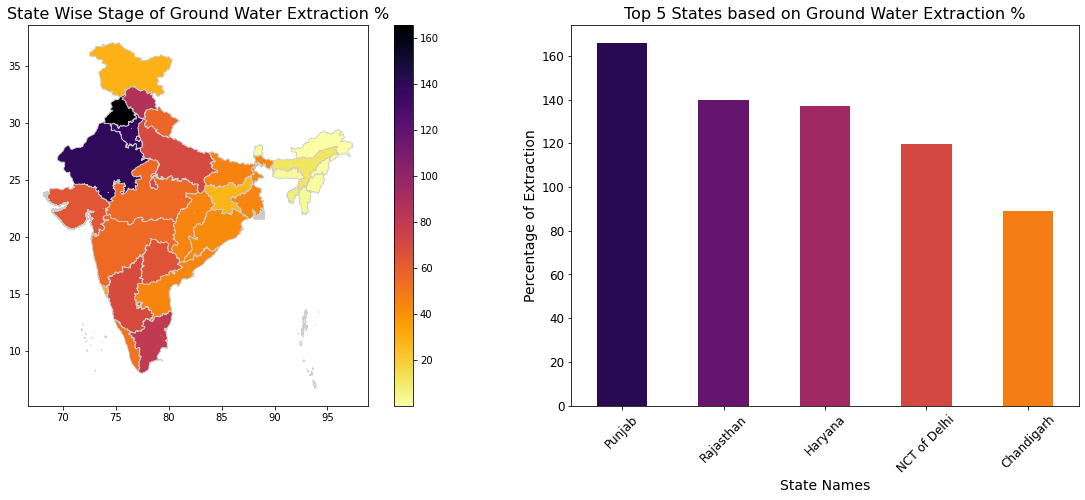

In [184]:
# Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1,2, figsize=(20, 7))
ax[0].set_title('State Wise Stage of Ground Water Extraction %', fontdict={'fontsize': '16', 'fontweight' : '1'})
# Plot the choropleth figure
merged.plot(column='Stage of Ground Water Extraction (%)', cmap = matplotlib.cm.get_cmap('inferno_r'), ax=ax[0] , linewidth=0.8, edgecolor='0.8', legend=True)

# Plot the bar graph
ax[1].set_title('Top 5 States based on Ground Water Extraction %', fontdict={'fontsize': '16', 'fontweight' : '1'})
top_states.plot.bar(y='Stage of Ground Water Extraction (%)',x ='st_nm', ax=ax[1], color = sns.color_palette("inferno"),fontsize=12)
ax[1].set_xlabel("State Names",fontsize = 14)
plt.xticks(rotation=45)
ax[1].set_ylabel("Percentage of Extraction",fontsize = 14)
fig.show()

Observations from visualization:
*   States like Punjab,Rajasthan,Haryana,Delhi and Chandigarh have the highest extraction rates of ground water.
*   In states like Punjab, Rajasthan, Haryana and Delhi, the extraction rate of Ground water is more than 100%.



### 2) Visual Representation of 
+ Which states receive the most recharge to their groundwater reserves through the rain? (Top 5).
+ Ground water recharge through rainfall.

In [185]:
#Creating a dataframe with required columns
df_recharge_rain = df_states[['Name of State','Recharge from rainfall During Monsoon Season','Recharge from rainfall During Non Monsoon Season']]
#calculating total rain with both on and off season values
df_recharge_rain["Total Rainfall Recharge"] = df_recharge_rain["Recharge from rainfall During Monsoon Season"] + df_recharge_rain["Recharge from rainfall During Non Monsoon Season"]
#Removing columns that are not needed any longer
df_recharge_rain = df_recharge_rain.drop(['Recharge from rainfall During Monsoon Season','Recharge from rainfall During Non Monsoon Season'],axis = 1)
#Merging the data with the geo data
merged = map_df.set_index('st_nm').join(df_recharge_rain.set_index('Name of State'))
#Converting the rainfall amount from 10 thousand cm to billion cubic meters (bcm)
merged['Total Rainfall Recharge'] = merged['Total Rainfall Recharge'].div(100000).round(2)
top_states = merged['Total Rainfall Recharge'].nlargest(n=5)

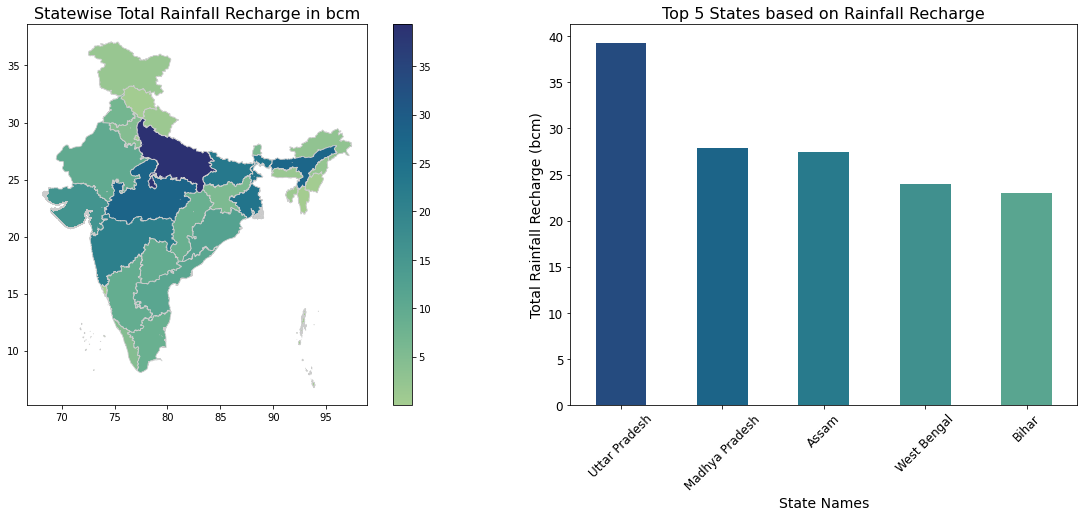

In [186]:
# Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1,2, figsize=(20, 7))
ax[0].set_title('Statewise Total Rainfall Recharge in bcm', fontdict={'fontsize': '16', 'fontweight' : '1'})
# Plot the choropleth figure
merged.plot(column='Total Rainfall Recharge', cmap = matplotlib.cm.get_cmap("crest"), ax=ax[0] , linewidth=0.8, edgecolor='0.8', legend=True)

# Plot the bar graph
ax[1].set_title('Top 5 States based on Rainfall Recharge', fontdict={'fontsize': '16', 'fontweight' : '1'})
top_states.plot.bar(y='Total Rainfall Recharge',x ='st_nm', ax=ax[1], color = sns.color_palette("crest_r"),fontsize=12)
ax[1].set_xlabel("State Names",fontsize = 14)
plt.xticks(rotation=45)
ax[1].set_ylabel("Total Rainfall Recharge (bcm)",fontsize = 14)
fig.show()

Observations from the visualization:
*   States such as Uttar Pradesh, Madhya Pradesh, Assam, West Bengal and Bihar receive the highest rainfall recharge to their ground water reserves. 
*   Rainfall, both in monsoon and nonmonsoon seasons, accounts for most of the ground water recharge throughout the country.



### 3) What are the states with the driest recharge rates of groundwater reserves?
Recharge Rate can be calculated as the amount of ground water recharged w.r.t the amount of ground water used for industrial, agricultural and domestic purpose or lost to the environment.

Recharge Rate = (Total Recharge/ (Total Extraction + Natural Discharges))*100

In [187]:
# New data frame created with required columns
df_recharge_rate = df_states[['Name of State','Total Annual Ground Water Recharge','Total Natural Discharges','Total Current Annual Ground Water Extraction']]
# Recharge Rate calculated
df_recharge_rate['Recharge Rate (%)'] = (df_recharge_rate['Total Annual Ground Water Recharge']/(df_recharge_rate['Total Natural Discharges']+df_recharge_rate['Total Current Annual Ground Water Extraction']))*100
# Removing columns that are not needed any longer
df_recharge_rate = df_recharge_rate.drop(['Total Annual Ground Water Recharge','Total Natural Discharges','Total Current Annual Ground Water Extraction'],axis = 1)
# Merging with map dataframe
merged = map_df.set_index('st_nm').join(df_recharge_rate.set_index('Name of State'))
# Rounding the percentage values
merged['Recharge Rate (%)'] = merged['Recharge Rate (%)'].round(2)
# Finding the 10 states with diriest recharge rates
bottom_states = merged['Recharge Rate (%)'].nsmallest(n=10)


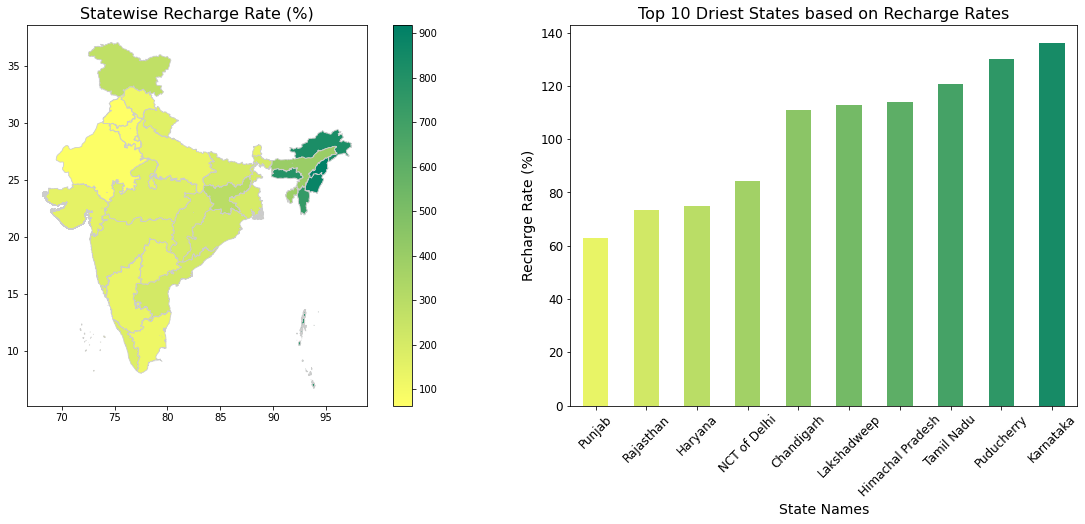

In [188]:
# Create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1,2, figsize=(20, 7))
ax[0].set_title('Statewise Recharge Rate (%)', fontdict={'fontsize': '16', 'fontweight' : '1'})
# Plot the choropleth figure
merged.plot(column='Recharge Rate (%)', cmap = matplotlib.cm.get_cmap("summer_r"), ax=ax[0] , linewidth=0.8, edgecolor='0.8', legend=True)
# Plot the bar graph
ax[1].set_title('Top 10 Driest States based on Recharge Rates', fontdict={'fontsize': '16', 'fontweight' : '1'})
bottom_states.plot.bar(y='Recharge Rate (%)',x ='st_nm', ax=ax[1], color = sns.color_palette("summer_r",10),fontsize=12)
ax[1].set_xlabel("State Names",fontsize = 14)
plt.xticks(rotation=45)
ax[1].set_ylabel("Recharge Rate (%)",fontsize = 14)
fig.show()

Observations from the visualization:
*   States like Punjab, Rajasthan, Haryana and Delhi consume more ground water than their ground water recharge rates (Recharge Rate < 100%), which can cause a ground water shortage in the future in those states.
*   North Eastern States on average have a recharge rate of over 700% !
*   Most States in the country have a healthy recharge rate of over 200%.



### 4) Statewise distribution of groundwater recharge through various sources.

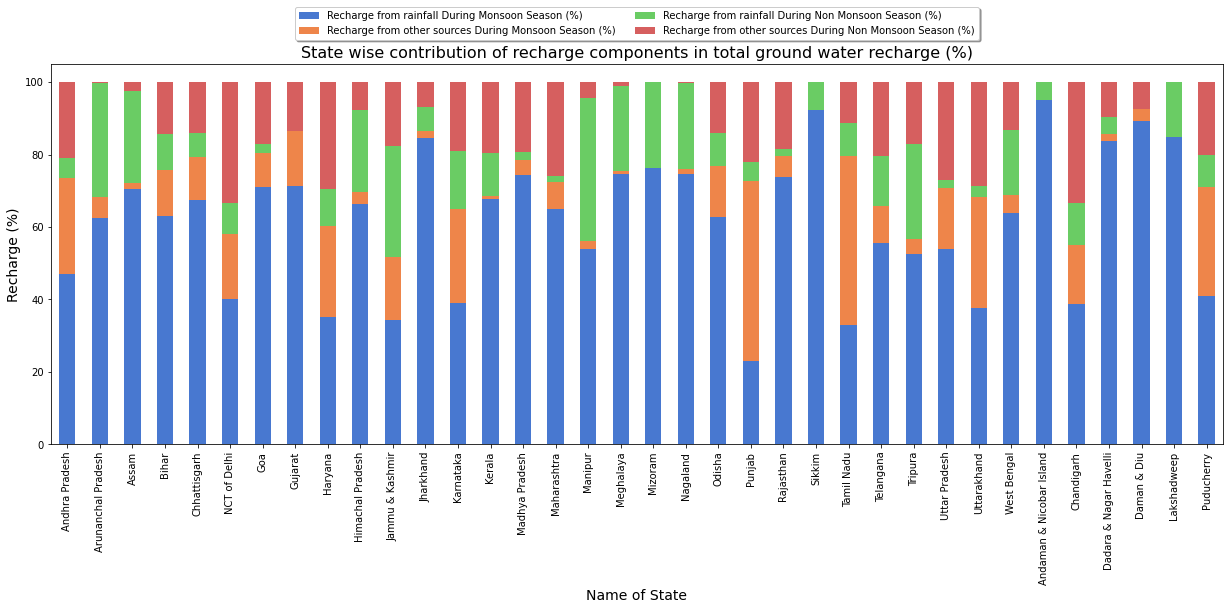

In [189]:
# New Dataframe created with required columns
df_recharge_distribution = df_states[['Name of State','Recharge from rainfall During Monsoon Season',
                                      'Recharge from other sources During Monsoon Season',
                                      'Recharge from rainfall During Non Monsoon Season',
                                      'Recharge from other sources During Non Monsoon Season','Total Annual Ground Water Recharge']]
#Calculating the Percentage value for each column w.r.t the total gw recharge column
df_recharge_distribution['Recharge from rainfall During Monsoon Season (%)'] = ((df_recharge_distribution['Recharge from rainfall During Monsoon Season']/df_recharge_distribution['Total Annual Ground Water Recharge'])*100).round(2)
df_recharge_distribution['Recharge from other sources During Monsoon Season (%)'] = ((df_recharge_distribution['Recharge from other sources During Monsoon Season']/df_recharge_distribution['Total Annual Ground Water Recharge'])*100).round(2)
df_recharge_distribution['Recharge from rainfall During Non Monsoon Season (%)'] = ((df_recharge_distribution['Recharge from rainfall During Non Monsoon Season']/df_recharge_distribution['Total Annual Ground Water Recharge'])*100).round(2)
df_recharge_distribution['Recharge from other sources During Non Monsoon Season (%)'] = ((df_recharge_distribution['Recharge from other sources During Non Monsoon Season']/df_recharge_distribution['Total Annual Ground Water Recharge'])*100).round(2)
#Dropping columns that are no longer needed
df_recharge_distribution = df_recharge_distribution.drop(['Recharge from rainfall During Monsoon Season',
                                                          'Recharge from other sources During Monsoon Season',
                                                          'Recharge from rainfall During Non Monsoon Season',
                                                          'Recharge from other sources During Non Monsoon Season',
                                                          'Total Annual Ground Water Recharge'],axis = 1)
#Plotting the Stacked bar graph
fig, ax = plt.subplots(1, figsize=(21, 7))
ax.set_title('State wise contribution of recharge components in total ground water recharge (%)', fontdict={'fontsize': '16', 'fontweight' : '1'})
ax.set_xlabel("State Names",fontsize = 14)
ax.set_ylabel("Recharge (%)",fontsize = 14)
df_recharge_distribution.plot(y = ['Recharge from rainfall During Monsoon Season (%)',
                          'Recharge from other sources During Monsoon Season (%)',
                          'Recharge from rainfall During Non Monsoon Season (%)',
                          'Recharge from other sources During Non Monsoon Season (%)'],x = 'Name of State',kind="bar", ax=ax, color = sns.set_palette('muted') ,stacked=True)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=True)
fig.show()


Observations from the visualization:
*   Nearly all states other than Punjab & Tamil Nadu recieve the maximum amount of recharge to their ground water reserves through rainfall during Monsoon



### 5) Agricultural Groundwater Use vs Industrial and Domestic Use
+ Overall usage pie-chart throughout India.
+ Which states consume more groundwater for industrial purposes than agriculture?

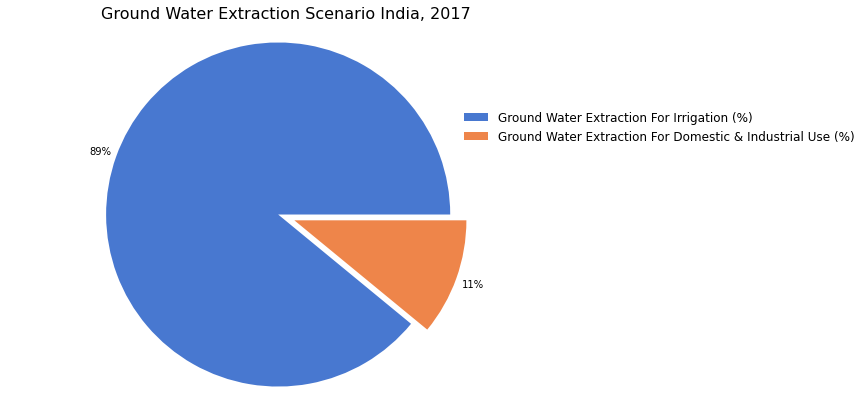

In [190]:
# Creating the dataframe with required columns
df_gw_usage = df_states[['Name of State','Current Annual Ground Water Extraction For Irrigation',
                         'Current Annual Ground Water Extraction For Domestic & Industrial Use',
                         'Total Current Annual Ground Water Extraction']]
# Calculating percentage values
irrig_perc = (df_gw_usage['Current Annual Ground Water Extraction For Irrigation'].sum()/df_gw_usage['Total Current Annual Ground Water Extraction'].sum())*100
indom_perc = (df_gw_usage['Current Annual Ground Water Extraction For Domestic & Industrial Use'].sum()/df_gw_usage['Total Current Annual Ground Water Extraction'].sum())*100

#Plotting the pie chart
fig, ax = plt.subplots(1, figsize=(10, 7))
labels = ['Ground Water Extraction For Irrigation (%)', 'Ground Water Extraction For Domestic & Industrial Use (%)']
explode=(0.1,0)
plt.pie([irrig_perc,indom_perc], explode=explode,  
       colors=sns.set_palette("muted"), autopct='%1.0f%%', 
       shadow=False, startangle=0,
       pctdistance=1.1)

ax.axis('equal')
ax.set_title("Ground Water Extraction Scenario India, 2017", fontdict={'fontsize': '16', 'fontweight' : '1'})
ax.legend(labels=labels, frameon=False, bbox_to_anchor=(0.8,0.8),fontsize = 12)
fig.show()


In [191]:
df_special = df_gw_usage.loc[(df_gw_usage['Current Annual Ground Water Extraction For Irrigation'] <
                              df_gw_usage['Current Annual Ground Water Extraction For Domestic & Industrial Use'])]
df_special['Status'] = 1
df_special.reset_index(drop=True,inplace=True)

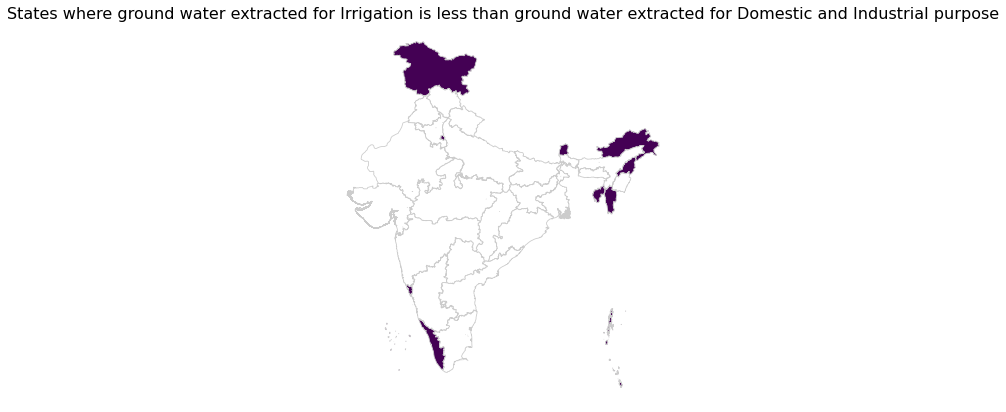

In [192]:
merged = map_df.set_index('st_nm').join(df_special.set_index('Name of State'))

fig,ax = plt.subplots(1,figsize=(7,7))
ax.axis('off')
merged.plot(column = 'Status', ax = ax, linewidth=0.8, edgecolor='0.8', missing_kwds={'color': 'white'})
ax.set_title("States where ground water extracted for Irrigation is less than ground water extracted for Domestic and Industrial purpose",fontsize = 16)
fig.show()

Observations from the visualization:
*   Almost 89% of all groundwater extracted in the country is used for Agricultiural Irrigation, only 11% of the extracted groundwater is used for Industrial or Domestic purposes.
*   Only a select few states such as Jammu & Kashmir, Kerela, Goa, Sikkim, Delhi, Arunachal Pradesh, Chandigarh, Mizoram, Nagaland, Tripura, Andaman & Nicobar Island, Dadara & Nagar Havelli and Lakshadweep use more water for Industrial and Domestic Purposes compared to agricultural purposes.




### 6) Changes in demand for groundwater draft w.r.t current demand. (For Industrial & Domestic Purposes)

Change in Demand = Projected Demand in 2025 - Current Demand (2017)

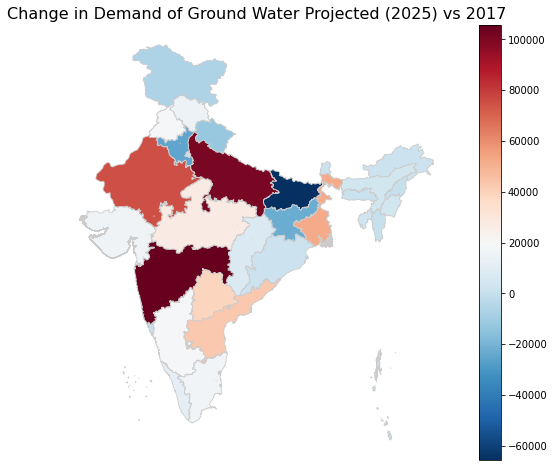

In [193]:
# Create a new dataframe with related columns
df_dom_demand = df_states[['Name of State','Current Annual Ground Water Extraction For Domestic & Industrial Use','Annual GW Allocation for Domestic Use as on 2025']]
# Calculate the change of the projected demand of 2025 wrt the current demand
df_dom_demand['Change in Demand'] = (df_dom_demand['Annual GW Allocation for Domestic Use as on 2025'] - df_dom_demand['Current Annual Ground Water Extraction For Domestic & Industrial Use']).round(2)
# Drop the columns not needed
df_dom_demand = df_dom_demand.drop(['Current Annual Ground Water Extraction For Domestic & Industrial Use','Annual GW Allocation for Domestic Use as on 2025'],axis = 1)

#Merging the new datagrame with the map dataframe
merged = map_df.set_index('st_nm').join(df_dom_demand.set_index('Name of State'))

#Plotting the map
fig,ax = plt.subplots(1,figsize=(10,8))
ax.set_title("Change in Demand of Ground Water Projected (2025) vs 2017", fontsize = 16)
ax.axis('off')
merged.plot(column = 'Change in Demand', ax = ax, linewidth=0.8, edgecolor='0.8', cmap = matplotlib.cm.get_cmap("RdBu_r"), legend = True)
fig.show()

Observations from the visualization:
*   In states like Rajasthan, Uttar Pradesh, Maharashtra, West Bengal and Andhra Pradesh, a significant increase in future demand till 2025 can be observed. 
*   In states such as Bihar, Hariyana, Jharkhand a Significant decrease in projected demand till 2025 can be observed.


### 7) Finding out the states using the most amount of groundwater for agricultural purposes. (Top 10)

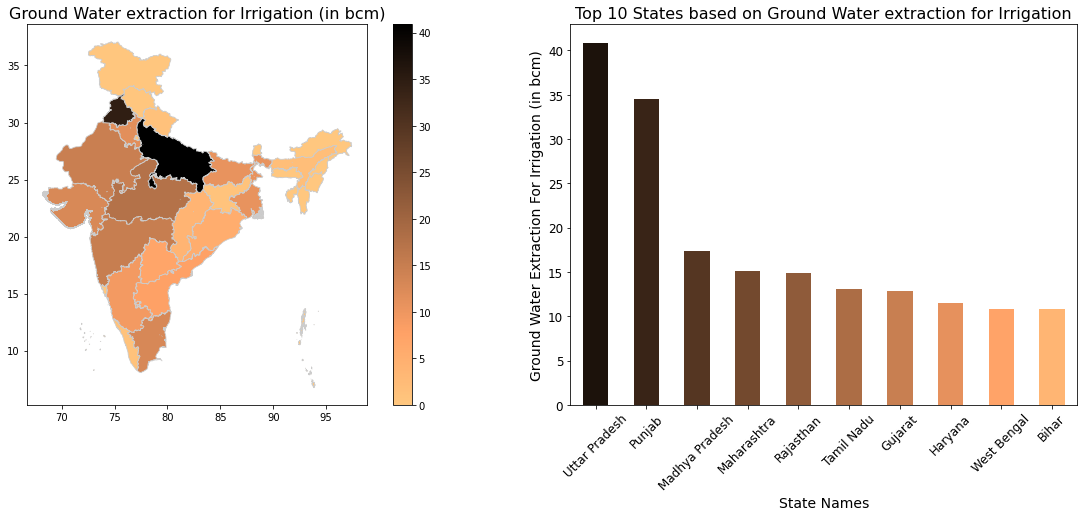

In [194]:
#Creating new dataframe with required columns
df_agro = df_states[['Name of State','Current Annual Ground Water Extraction For Irrigation']]
#Converting from 10 thousand cubic meters to bcm
df_agro['Current Annual Ground Water Extraction For Irrigation'] = df_agro['Current Annual Ground Water Extraction For Irrigation'].div(100000).round(2)
#Merging with the map dataframe
merged = map_df.set_index('st_nm').join(df_agro.set_index('Name of State'))
#Finding the top states
top_states = merged['Current Annual Ground Water Extraction For Irrigation'].nlargest(n=10)

#Plotting the map
fig,ax = plt.subplots(1,2, figsize =(20,7))
ax[0].set_title("Ground Water extraction for Irrigation (in bcm)", fontsize = 16)
merged.plot(column = 'Current Annual Ground Water Extraction For Irrigation',linewidth=0.8, edgecolor='0.8',ax = ax[0],cmap = matplotlib.cm.get_cmap("copper_r") ,legend = True)

# Plotting the bar graph
ax[1].set_title('Top 10 States based on Ground Water extraction for Irrigation', fontdict={'fontsize': '16', 'fontweight' : '1'})
top_states.plot.bar(y='Current Annual Ground Water Extraction For Irrigation',x ='st_nm', ax=ax[1], color = sns.color_palette("copper",10),fontsize=12)
ax[1].set_xlabel("State Names",fontsize = 14)
plt.xticks(rotation=45)
ax[1].set_ylabel("Ground Water Extraction For Irrigation (in bcm)",fontsize = 14)
fig.show()

Observations from the Visualization:
*   Uttar Pradesh and punjab extract a lot of ground water since they are some of the major producers of a number of crops (mainly wheat, sugarcane and rice) grown in India.
*   Madhya Pradesh, Maharashtra, Rajasthan and Gujarat are among the major producers of cotton and soyabean both of which require a lot of water for cultivation.
*   West Bengal, Bihar and Tamil Nadu are the major producers of Rice in India which requires a lot of water.



### 8) Small case study on West Bengal ground water recharge and extraction

Creating West Bengal district level geopandas dataframe from SHP file

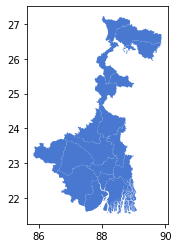

In [195]:
fp = "drive/MyDrive/Igismap/westbengal_district.shp"
wb_map_df = gpd.read_file(fp)
wb_map_df = wb_map_df.drop(['cartodb_id','censuscode','dt_cen_cd','st_cen_cd','st_nm'],axis=1)
wb_map_df.plot()

Arranging and creating new data frames for the state level.

In [196]:
# Fetching the data for west bengal into a new dataframe
df_wb_st = df_states.loc[(df_states['Name of State'] == "West Bengal")]

# fetching district level data
df_wb_dist = df_main.loc[(df_main['Name of State'] == "WEST BENGAL")].drop(['S.no.','Name of State'], axis = 1)
df_wb_dist.reset_index(drop=True,inplace=True)

#Adjusting the District Names to match with geopandas dataframe
df_wb_dist["Name of District"].iloc[0]  = 'Koch Bihar'
df_wb_dist["Name of District"].iloc[2]  = 'Darjiling'
df_wb_dist["Name of District"].iloc[5]  = 'Maldah'
df_wb_dist["Name of District"].iloc[8]  = 'North 24 Parganas'
df_wb_dist["Name of District"].iloc[9]  = 'Haora'
df_wb_dist["Name of District"].iloc[10]  = 'Hugli'
df_wb_dist["Name of District"].iloc[11]  = 'Barddhaman'
df_wb_dist["Name of District"].iloc[14]  = 'Puruliya'
df_wb_dist["Name of District"].iloc[15]  = 'Purba Medinipur'
df_wb_dist["Name of District"].iloc[16]  = 'Pashchim Medinipur'

**1) District-wise amount of total groundwater recharge , total extraction and recharge-rate**


In [197]:
#Creating new dataframe with required columns
df_wb_rech_extr = df_wb_dist[['Name of District','Total Annual Ground Water Recharge','Total Natural Discharges','Total Current Annual Ground Water Extraction']]
# Recharge Rate calculated
df_wb_rech_extr['Recharge Rate (%)'] = ((df_wb_rech_extr['Total Annual Ground Water Recharge']/(df_wb_rech_extr['Total Natural Discharges'] + df_wb_rech_extr['Total Current Annual Ground Water Extraction']))*100).round(2)
# Converting to bcm
df_wb_rech_extr['Total Annual Ground Water Recharge'] = df_wb_rech_extr['Total Annual Ground Water Recharge'].div(100000).round(2)
df_wb_rech_extr['Total Natural Discharges'] = df_wb_rech_extr['Total Natural Discharges'].div(100000).round(2)
df_wb_rech_extr['Total Current Annual Ground Water Extraction'] = df_wb_rech_extr['Total Current Annual Ground Water Extraction'].div(100000).round(2)
# Merging with wb-districts geopandas dataframe
merged = wb_map_df.set_index('district').join(df_wb_rech_extr.set_index('Name of District'))

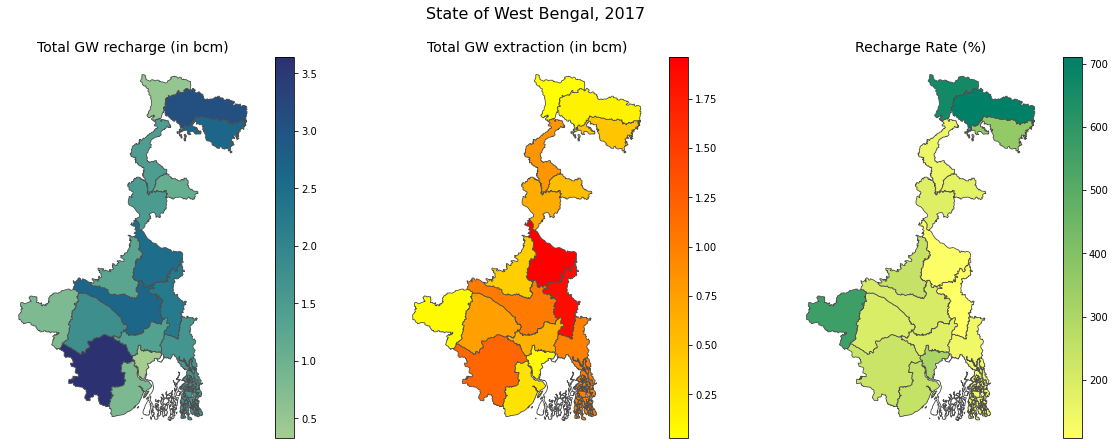

In [198]:
fig,ax = plt.subplots(1,3, figsize =(20,7))
#Plotting the map of total gw recharge
ax[0].set_title("Total GW recharge (in bcm)", fontsize = 14)
ax[0].axis('off')
merged.plot(column = 'Total Annual Ground Water Recharge',linewidth=0.8, edgecolor='0.3',
            ax = ax[0],cmap = matplotlib.cm.get_cmap("crest") ,
            missing_kwds={'color': 'white'},
            legend = True)
#Plotting the map of total gw extraction
ax[1].set_title("Total GW extraction (in bcm)", fontsize = 14)
ax[1].axis('off')
merged.plot(column = 'Total Current Annual Ground Water Extraction',linewidth=0.8, edgecolor='0.3',
            ax = ax[1],cmap = matplotlib.cm.get_cmap("autumn_r") ,
            missing_kwds={'color': 'white'},
            legend = True)
#Plotting the map of gw recharge rate %
ax[2].set_title("Recharge Rate (%)", fontsize = 14)
ax[2].axis('off')
merged.plot(column = 'Recharge Rate (%)',linewidth=0.8, edgecolor='0.3',
            ax = ax[2],cmap = matplotlib.cm.get_cmap("summer_r") ,
            missing_kwds={'color': 'white'},
            legend = True)
fig.suptitle('State of West Bengal, 2017', fontsize = 16)
fig.show()

**2) Agricultural GW use vs Industrial and Domestic GW use** 

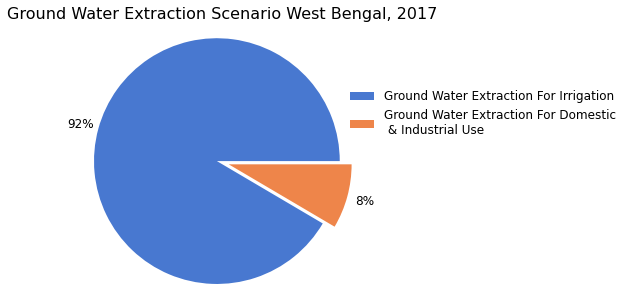

In [199]:
irrig = df_wb_st['Current Annual Ground Water Extraction For Irrigation']
indom = df_wb_st['Current Annual Ground Water Extraction For Domestic & Industrial Use']
#Plotting the pie chart
fig, ax = plt.subplots(1, figsize=(7, 5))
labels = ['Ground Water Extraction For Irrigation', 'Ground Water Extraction For Domestic \n & Industrial Use']
explode=(0.1,0)
plt.pie([irrig,indom], explode=explode,  
       colors=sns.set_palette("muted"), autopct='%1.0f%%', 
       shadow=False, startangle=0,
       pctdistance=1.15, textprops={'fontsize': 12})

ax.axis('equal')
ax.set_title("Ground Water Extraction Scenario West Bengal, 2017", fontdict={'fontsize': '16', 'fontweight' : '1'})
ax.legend(labels=labels, frameon=False, bbox_to_anchor=(0.8,0.8),fontsize = 12)
fig.show()

**3) Contribution to GW recharge by various sources**

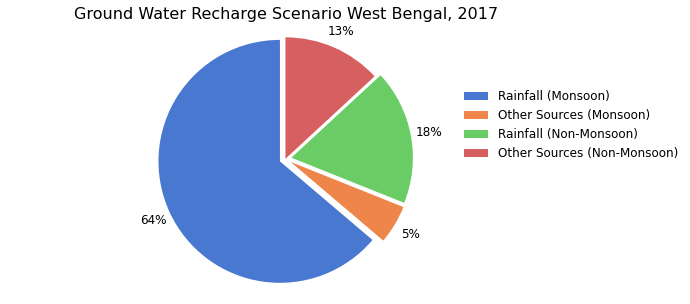

In [200]:
rech_1 = df_wb_st['Recharge from rainfall During Monsoon Season']
rech_2 = df_wb_st['Recharge from other sources During Monsoon Season']
rech_3 = df_wb_st['Recharge from rainfall During Non Monsoon Season']
rech_4 = df_wb_st['Recharge from other sources During Non Monsoon Season']
#Plotting the pie chart
fig, ax = plt.subplots(1, figsize=(10, 5))
labels = ['Rainfall (Monsoon)', 'Other Sources (Monsoon)', 'Rainfall (Non-Monsoon)', 'Other Sources (Non-Monsoon)']
explode=(0.05,0.05,0.05,0)
plt.pie([rech_1,rech_2,rech_3,rech_4], explode=explode,  
       colors=sns.set_palette("muted"), autopct='%1.0f%%', 
       shadow=False, startangle=90,
       pctdistance=1.15, textprops={'fontsize': 12})

ax.axis('equal')
ax.set_title("Ground Water Recharge Scenario West Bengal, 2017", fontdict={'fontsize': '16', 'fontweight' : '1'})
ax.legend(labels=labels, frameon=False, bbox_to_anchor=(0.8,0.8),fontsize = 12)
fig.show()